In [1]:
import keras
print (keras.__version__)

2.10.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_index = imdb.get_word_index()
#word_index.items()
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
type(reverse_word_index)

dict

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[(i,sequence)] = 1
    
    return results
    
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [9]:
for i,c in enumerate(['A','B','C'], start=1):
    print(i,c)

1 A
2 B
3 C


In [10]:
temp = enumerate(['A','B','C'])
next(temp)
next(temp)
next(temp)

(2, 'C')

In [11]:
# float 타입으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
#신경망의 구축

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [14]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5634 - accuracy: 0.7409 - val_loss: 0.4760 - val_accuracy: 0.8376
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3578 - accuracy: 0.8971 - val_loss: 0.3417 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2621 - accuracy: 0.9223 - val_loss: 0.2942 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2061 - accuracy: 0.9385 - val_loss: 0.2813 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1675 - accuracy: 0.9505 - val_loss: 0.2818 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1373 - accuracy: 0.9603 - val_loss: 0.3097 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1147 - accuracy: 0.9671 - val_loss: 0.3042 - val_accuracy: 0.8804
Epoch 8/20
30

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )

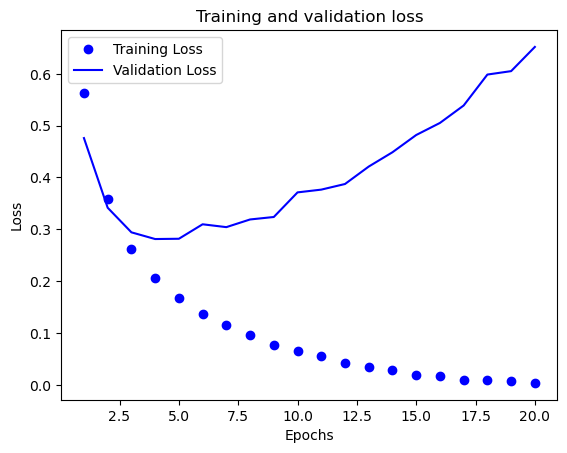

In [18]:
#실험 결과를 시각화 한다.
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

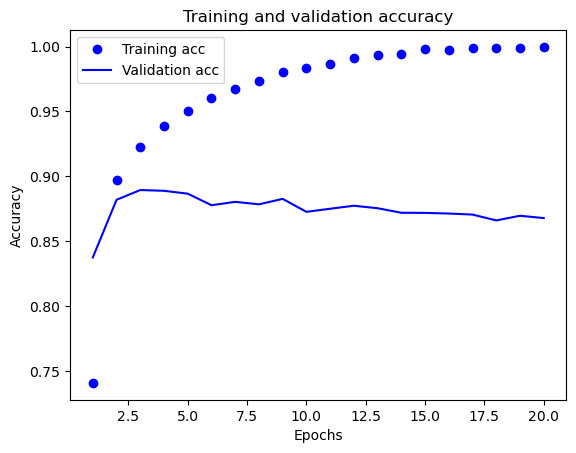

In [19]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-',label =  'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [23]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.7715 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.8027 - val_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 6.8809e-04 - accuracy: 0.9999 - val_loss: 0.8282 - val_accuracy: 0.8652
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 5.7909e-04 - accuracy: 0.9999 - val_loss: 0.8612 - val_accuracy: 0.8653
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.9494 - val_accuracy: 0.8609
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 3.8904e-04 - accuracy: 0.9999 - val_loss: 0.9284 - val_accuracy: 0.8640
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 2.9481e-04 - accuracy: 0.9999 - val_loss: 0.9525 - val_accuracy: 0.86